### Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [25]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import LabelEncoder

from imblearn.over_sampling import SMOTE
#need stratifeildKfold for increase cvs.
from sklearn.model_selection import StratifiedKFold

In [4]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
# mapping = {
#     "Mon": 1,
#     "Tue": 2,
#     "Wed": 3,
#     "Thu": 4,
#     "Fri": 5,
#     "Sat": 6,
#     "Sun": 7,
# }

# df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
# df["flight_day"].unique()

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
df.isna().sum()  # checking weather there is any null values

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [21]:
# so there in no null value in our data
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int64  
 8   booking_origin         50000 non-null  int64  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


(50000, 14)

In [11]:
df.dropna().sum()

,0
num_passengers,79562
sales_channel,InternetInternetInternetInternetInternetIntern...
trip_type,RoundTripRoundTripRoundTripRoundTripRoundTripR...
purchase_lead,4247024
length_of_stay,1152228
flight_hour,453317
flight_day,SatSatWedSatWedThuThuMonMonSunTueSatMonFriTueT...
route,AKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLDELAKLD...
booking_origin,New ZealandNew ZealandIndiaNew ZealandIndiaNew...
wants_extra_baggage,33439


### Encoding the categorical columns


In [12]:
LE = LabelEncoder()
categorical_columns = ['sales_channel','trip_type','route','booking_origin','flight_day']
encoded = {}
for col in categorical_columns:
    df[col] = LE.fit_transform(df[col])
    encoded[col] = dict(zip(LE.classes_,LE.transform(LE.classes_)))
    print(f"Encoded maps for cols :{col}",encoded[col])


Encoded maps for cols :sales_channel {'Internet': np.int64(0), 'Mobile': np.int64(1)}
Encoded maps for cols :trip_type {'CircleTrip': np.int64(0), 'OneWay': np.int64(1), 'RoundTrip': np.int64(2)}
Encoded maps for cols :route {'AKLDEL': np.int64(0), 'AKLHGH': np.int64(1), 'AKLHND': np.int64(2), 'AKLICN': np.int64(3), 'AKLKIX': np.int64(4), 'AKLKTM': np.int64(5), 'AKLKUL': np.int64(6), 'AKLMRU': np.int64(7), 'AKLPEK': np.int64(8), 'AKLPVG': np.int64(9), 'AKLTPE': np.int64(10), 'AORICN': np.int64(11), 'AORKIX': np.int64(12), 'AORKTM': np.int64(13), 'AORMEL': np.int64(14), 'AORPER': np.int64(15), 'AORPUS': np.int64(16), 'BBIMEL': np.int64(17), 'BBIOOL': np.int64(18), 'BBIPER': np.int64(19), 'BBISYD': np.int64(20), 'BDOCTS': np.int64(21), 'BDOCTU': np.int64(22), 'BDOHGH': np.int64(23), 'BDOICN': np.int64(24), 'BDOIKA': np.int64(25), 'BDOKIX': np.int64(26), 'BDOMEL': np.int64(27), 'BDOOOL': np.int64(28), 'BDOPEK': np.int64(29), 'BDOPER': np.int64(30), 'BDOPUS': np.int64(31), 'BDOPVG': np.int

In [13]:
df.info()# can see that all cols change or map into int(64).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  int64  
 8   booking_origin         50000 non-null  int64  
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 5.3 MB


### Now selecting our Features for model.


In [14]:
X =df.drop('booking_complete',axis=1)
y= df['booking_complete']
print(f'accuracy score : ',y.value_counts())

accuracy score :  booking_complete
0    42522
1     7478
Name: count, dtype: int64


In [15]:
#Apply SMOTE to fix imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After SMOTE:\n", y_resampled.value_counts())


After SMOTE:
 booking_complete
0    42522
1    42522
Name: count, dtype: int64


### Use randonforest model

In [16]:
#spliting Balanced data helped by smote for test and train (by train_test_split method)
X_train,X_test,y_train,y_test =train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=48)
model = RandomForestClassifier(n_estimators=100,max_depth=10,class_weight='balanced',random_state=48)
model.fit(X_train,y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=48)

### Evaluating the model form its prediction.

In [17]:
y_predict = model.predict(X_test)
print(f"Classification Report : \n{classification_report(y_test,y_predict)}")
print("\n")
print(f"Accuracy Score :{accuracy_score(y_test,y_predict)}")
print(f"Precision Score : {precision_score(y_test,y_predict)}")
print(f"Recall Score : {recall_score(y_test,y_predict)}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.70      0.76     12876
           1       0.74      0.85      0.79     12638

    accuracy                           0.77     25514
   macro avg       0.78      0.78      0.77     25514
weighted avg       0.78      0.77      0.77     25514



Accuracy Score :0.7749470878733244
Precision Score : 0.7359704352586914
Recall Score : 0.850925779395474


In [18]:
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_predict)}")
print("\n")
print(f" F1 score : {f1_score(y_test,y_predict)}")

Confusion Matrix : 
[[ 9018  3858]
 [ 1884 10754]]


 F1 score : 0.7892844036697247


### Now checking the cross validation check of model reliablity
for that we check on 6 folds (6 parts of data) and test on each

In [27]:
Cv_score = cross_val_score(model,X_resampled,y_resampled,cv=10)
print(f'CVS score :',Cv_score.mean()*100)

CVS score : 60.68484699664798


### As we see from Cv validation mean is very low :(

### Than after this I try STRAITFIELDFOLD to increase the cross validation score

In [26]:
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=48)
cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=SKF)
print("Stratified CV Score:", cv_scores)
print("Mean:",cv_scores.mean()*100)


Stratified CV Score: [0.76794638 0.76718208 0.77259098 0.7809983  0.77716369]
Mean: 77.31762850689363


## Feature Importance and Feature Visulization.

In [34]:
importance = model.feature_importances_
features = X.columns
featureDataframe = pd.DataFrame({'Feature':features,'Importance':importance})
featureDataframe = featureDataframe.sort_values('Importance',ascending=False)
print(f"freature importance : \n{featureDataframe}",f" \n \n Importance : {featureDataframe['Importance'].sum()}")

freature importance : 
                  Feature  Importance
8          booking_origin    0.373298
12        flight_duration    0.136492
4          length_of_stay    0.102211
1           sales_channel    0.097375
7                   route    0.088574
6              flight_day    0.052624
3           purchase_lead    0.041879
11  wants_in_flight_meals    0.030797
5             flight_hour    0.029888
0          num_passengers    0.023650
10   wants_preferred_seat    0.017098
9     wants_extra_baggage    0.004619
2               trip_type    0.001493  
 
 Importance : 0.9999999999999999


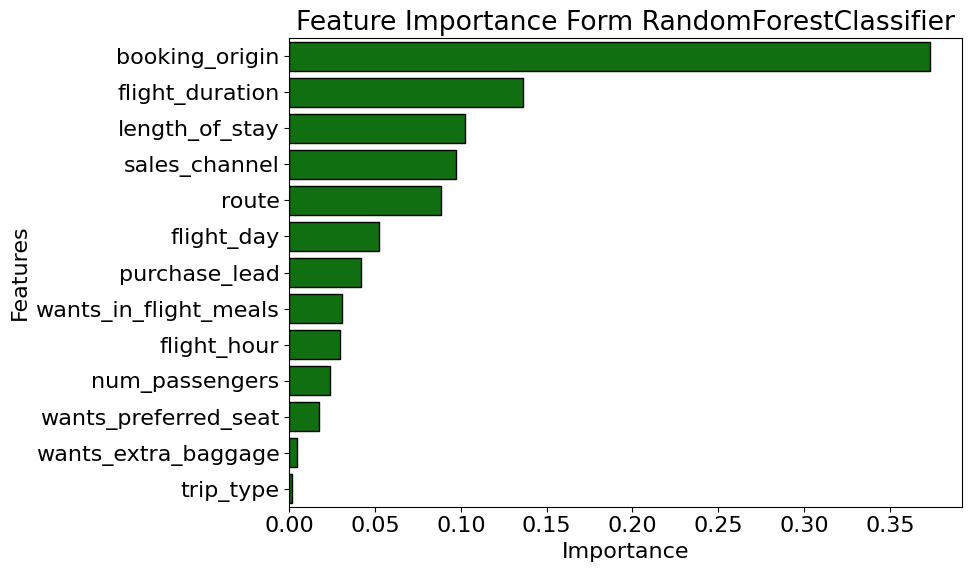

In [49]:
# VISUALIZATION :

plt.rcParams['font.family'] = 'sans-serif'  # You can also try 'monospace', 'cursive', 'sans-serif'
plt.rcParams['font.size'] = 16
plt.figure(figsize= (10,6))
sns.barplot(x='Importance',y='Feature',data=featureDataframe,color='green',edgecolor='black')
# plt.xticks(rotation=90)
plt.title('Feature Importance Form RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Features')
# plt.grid(True,axis='x',linestyle='--',alpha=0.5)
plt.tight_layout()
plt.show()

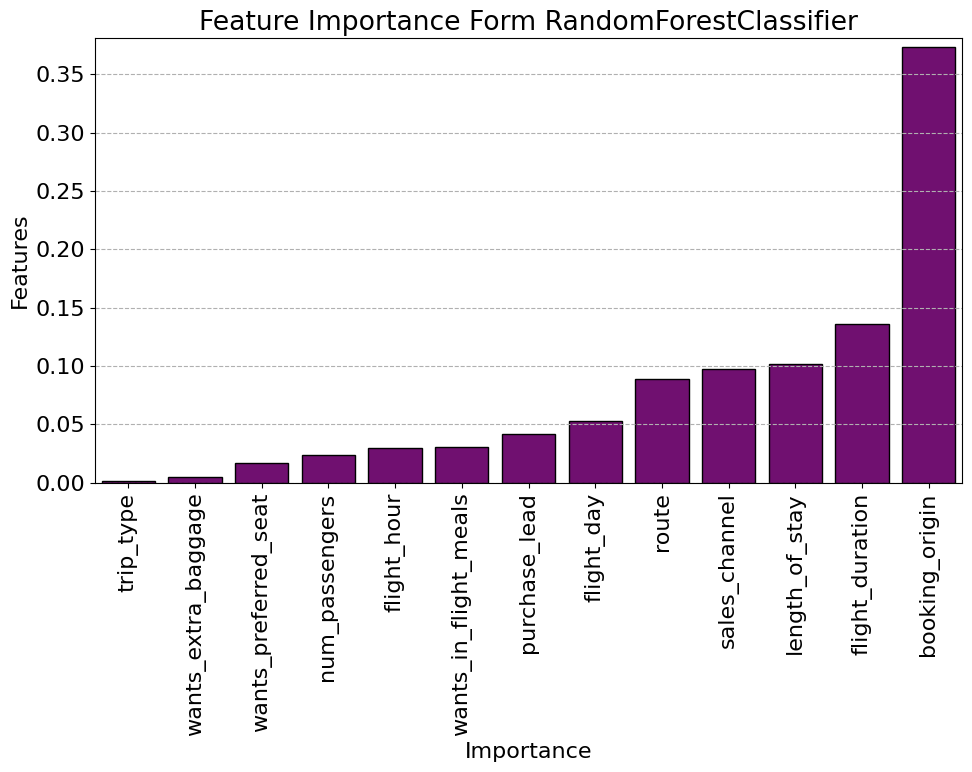

In [77]:
# VISUALIZATION :

plt.rcParams['font.family'] = 'sans-serif'  # You can also try 'monospace', 'cursive', 'sans-serif'
plt.rcParams['font.size'] = 16
plt.figure(figsize= (10,8))
sns.barplot(y='Importance',x='Feature',data=featureDataframe.sort_values(by='Importance',ascending=True),color='purple',edgecolor='black')
plt.xticks(rotation=90)
plt.title('Feature Importance Form RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(axis='y',linestyle='--',alpha=1)
plt.gca().margins(y=0.02)
plt.tight_layout()
plt.show()